In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tslearn.clustering import TimeSeriesKMeans
from random import shuffle


## 讀取基線修正地震之反應譜資料

In [3]:
dataDir = r'E:\\我的雲端硬碟\\AI center intern\\nonlinear_seismic_response_analysis\\August\\0.2g_Earthquake\\' 
mat_data = scipy.io.loadmat(dataDir+'NewData_Disp_BC.mat')
BC_Spectrum = mat_data['BC_Spectrum']


## 利用Time Series K-Means以非人工方式將自料分成兩類

In [4]:
model = TimeSeriesKMeans(n_clusters=2, metric="dtw",verbose=True)
label = model.fit_predict(BC_Spectrum)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 718 out of 718 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1436 out of 1436 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1436 out of 1436 | elapsed:    0.6s finished
246.265 -->[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1436 out of 1436 | elapsed:    0.6s finished
174.767 -->[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1436 out of 1436 | elapsed:    0.6s finished
158.380 -->[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1436 out of 1436 | elapsed:    0.6s finished
153.320 -->[Parallel(n_jobs=1)]: Using backend Sequ

## 檢視資料分類結果

cluster0資料數: 121
cluster1資料數: 597


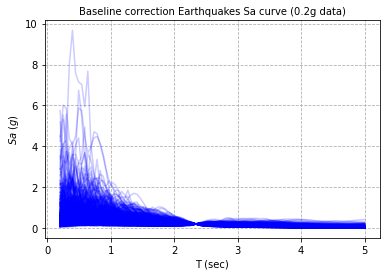

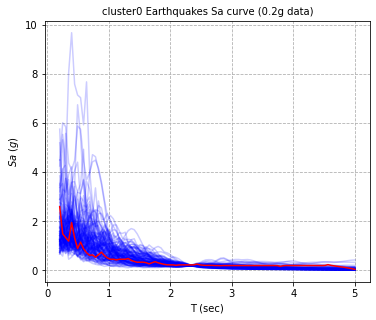

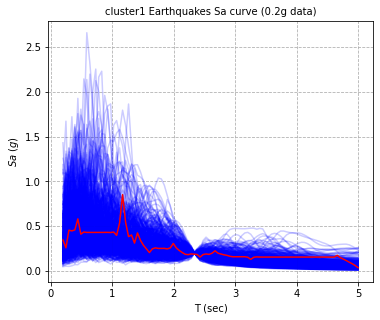

In [11]:
cluster0 = BC_Spectrum[label==0]
cluster1 = BC_Spectrum[label==1]
print('cluster0資料數:',cluster0.shape[0])
print('cluster1資料數:',cluster1.shape[0])

plt.figure()
for i in range(BC_Spectrum.shape[0]):
    plt.plot(np.linspace(0.2, 5, 100),BC_Spectrum[i]/9.8,c='b',alpha=0.2)
plt.title('Baseline correction Earthquakes Sa curve (0.2g data)',fontsize=10)
plt.xlabel('T (sec)')
plt.ylabel('$Sa\ (g)$')
plt.grid(linestyle='--')

plt.figure(figsize=(12.8, 4.8))
plt.subplot(1, 2, 1)
for i in range(cluster0.shape[0]):
    plt.plot(np.linspace(0.2, 5, 100),cluster0[i]/9.8,"b-",alpha=0.2)
plt.plot(np.linspace(0.2, 5, 100),(model.cluster_centers_[0]/9.8).ravel(), "r-")
plt.title('cluster0 Earthquakes Sa curve (0.2g data)',fontsize=10)
plt.xlabel('T (sec)')
plt.ylabel('$Sa\ (g)$')
plt.grid(linestyle='--')

plt.figure(figsize=(12.8, 4.8))
plt.subplot(1, 2, 2)
for i in range(cluster1.shape[0]):
    plt.plot(np.linspace(0.2, 5, 100),cluster1[i]/9.8,"b-",alpha=0.2)
plt.plot(np.linspace(0.2, 5, 100),(model.cluster_centers_[1]/9.8).ravel(), "r-") 
plt.title('cluster1 Earthquakes Sa curve (0.2g data)',fontsize=10)
plt.xlabel('T (sec)')
plt.ylabel('$Sa\ (g)$')
plt.grid(linestyle='--')



## 將Time Series K-Means分為兩類的資料疊圖進行比較

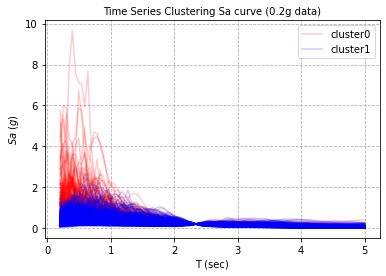

In [14]:

plt.figure()
plt.plot(np.linspace(0.2, 5, 100),cluster0[0]/9.8,"r-",alpha=0.2,label='cluster0')
for i in range(1,cluster0.shape[0]):
    plt.plot(np.linspace(0.2, 5, 100),cluster0[i]/9.8,"r-",alpha=0.2)

plt.plot(np.linspace(0.2, 5, 100),cluster1[i]/9.8,"b-",alpha=0.2,label='cluster1')
for i in range(1,cluster1.shape[0]):
    plt.plot(np.linspace(0.2, 5, 100),cluster1[i]/9.8,"b-",alpha=0.2)
#plt.plot(np.linspace(0.2, 5, 100),(model.cluster_centers_[0]/9.8).ravel(), "black")
#plt.plot(np.linspace(0.2, 5, 100),(model.cluster_centers_[1]/9.8).ravel(), "black") 
plt.title('Time Series Clustering Sa curve (0.2g data)',fontsize=10)
plt.xlabel('T (sec)')
plt.ylabel('$Sa\ (g)$')
plt.grid(linestyle='--')
plt.legend(loc = 'upper right') 




## 儲存分類後的資料

In [17]:
#cluster0 資料
X_stack_BC = mat_data['X_stack_BC'][label==1]
y_Disp_stack_BC = mat_data['y_Disp_stack_BC'][label==1]
name_BC = mat_data['name_BC'][label==1]
steps_BC = mat_data['steps_BC'][0][label==1]

#cluster 1 list shuffle
Ind = list(range(X_stack_BC.shape[0]))
shuffle(Ind)
trainInd = Ind[:round(0.8*len(Ind))]
trainInd.sort()
testInd = Ind[round(0.8*len(Ind)):]
testInd.sort()

#分train test set
X_train_stack = X_stack_BC[trainInd]
y_Disp_train_stack = y_Disp_stack_BC[trainInd]
X_test_stack = X_stack_BC[testInd]
y_Disp_test_stack = y_Disp_stack_BC[testInd]

name_train = name_BC[trainInd]
name_test = name_BC[testInd]
steps_train = steps_BC[trainInd]
steps_test = steps_BC[testInd]

X_test_stack_c0 = mat_data['X_stack_BC'][label==0]
y_Disp_test_stack_c0 = mat_data['y_Disp_stack_BC'][label==0]
name_test_c0 = mat_data['name_BC'][label==0]
steps_test_c0 = mat_data['steps_BC'][0][label==0]



In [19]:
scipy.io.savemat(dataDir+'NewData_Disp_BC_Cluster.mat',
                 { 'X_train_stack': X_train_stack,'y_Disp_train_stack':y_Disp_train_stack,'X_test_stack':X_test_stack,'y_Disp_test_stack':y_Disp_test_stack,
                 'name_train':name_train,'name_test':name_test,'steps_train':steps_train,'steps_test':steps_test,
                 'X_test_stack_c0':X_test_stack_c0,'y_Disp_test_stack_c0':y_Disp_test_stack_c0,'name_test_c0':name_test_c0,'steps_test_c0':steps_test_c0,
                 'label':label})